**Used Cars Exploratory Data Analysis and Visualizations**

Price Distribution

>To begin the visual exploration of my dataset, I first plot the distribution of used car prices. I use a histogram with 50 bins along with a KDE (kernel density estimate) curve to better understand how car prices are spread across the dataset.

I do this because understanding the distribution of the target variable (price) is critical before modeling. It helps me spot skewness, outliers, and price ranges where most vehicles are concentrated.

From the plot, I notice that the distribution is heavily right-skewed. Most cars are priced below 50,000 but there are a few outliers with prices going up to $2.5 million. This tells me I might need to apply transformations (like log scaling) before regression modeling to stabilize variance and reduce the effect of extreme values.

In [3]:
#Importing libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

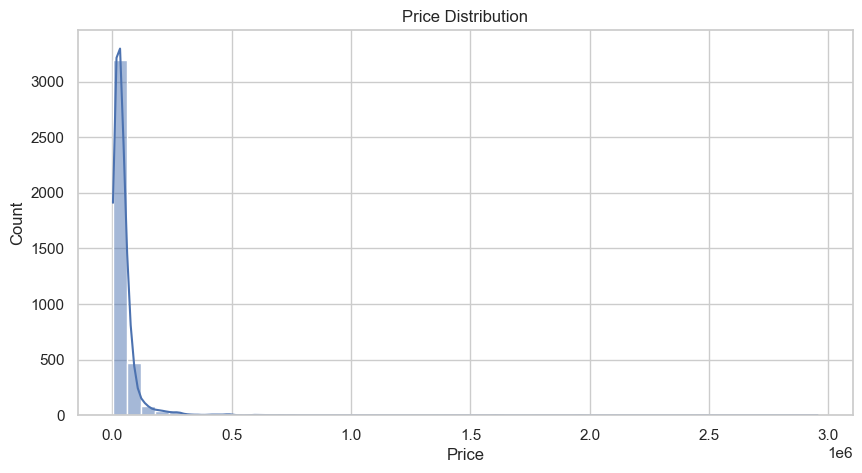

In [4]:
df = pd.read_csv("../src/data/used_cars_cleaned.csv")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# --- EDA Plots ---
# Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

Next, I create a scatter plot to examine the relationship between a car’s mileage and its price. Since mileage is a key factor in vehicle depreciation, I expect to observe a negative correlation with price.

I use this plot to visually detect patterns, outliers, and the nature of the relationship between these two variables. The alpha=0.5 makes overlapping points more transparent, which helps with dense regions of the plot.

As expected, there's a clear downward trend — cars with lower mileage tend to be priced higher, while cars with high mileage are generally less expensive. This supports the assumption that mileage significantly affects resale value and suggests that milage will likely be an important predictor in my regression models.

I also notice a few extreme outliers with very low mileage but extremely high prices (possibly luxury or exotic cars), which I may need to investigate or filter out before modeling.

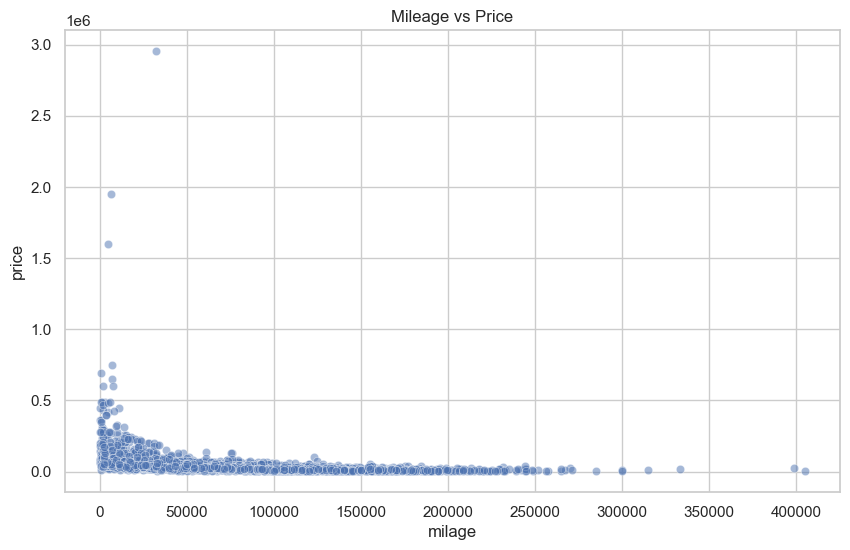

In [5]:
# Mileage vs Price
plt.figure(figsize=(10,6))
sns.scatterplot(x="milage", y="price", data=df, alpha=0.5)
plt.title("Mileage vs Price")
plt.show()


Next, I visualize how car prices vary across different fuel types using a boxplot. Fuel type is a key categorical feature that can influence a vehicle's value due to factors like fuel efficiency, environmental impact, and market demand.

I choose a boxplot because it clearly shows the distribution, median, and spread of prices for each fuel category, while also highlighting any outliers.

Most fuel types — such as Gasoline, Hybrid, and Diesel — have overlapping price ranges, but Gasoline cars show the widest spread, with several extreme outliers (possibly luxury sports cars). Some categories like Plug-In Hybrid and E85 Flex Fuel also include high-priced outliers, though the overall median stays lower.

This plot helps me confirm that fuel type may be a useful categorical feature in my model, especially if I handle rare categories and outliers properly.

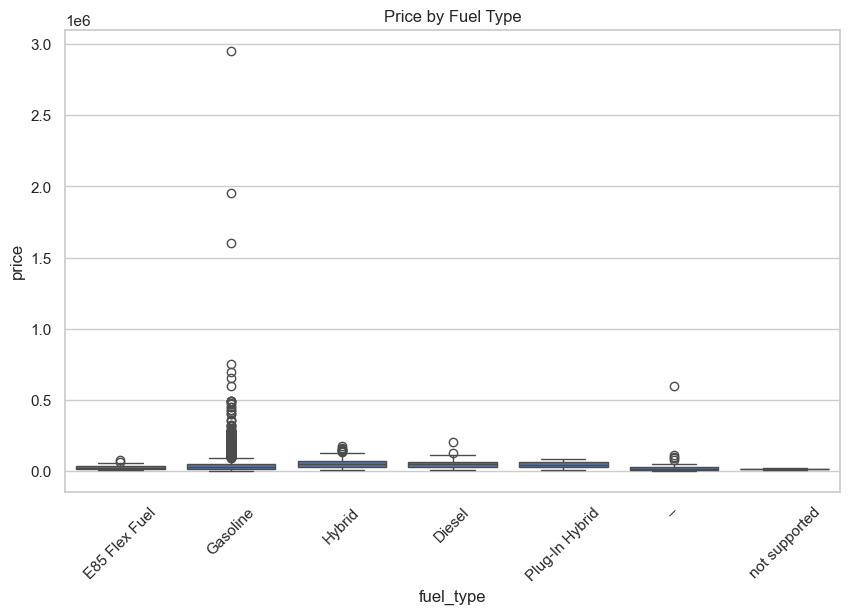

In [6]:
# Price by Fuel Type
plt.figure(figsize=(10,6))
sns.boxplot(x="fuel_type", y="price", data=df)
plt.title("Price by Fuel Type")
plt.xticks(rotation=45)
plt.show()

To explore whether the transmission type affects resale value, I plot a boxplot of price against trans_type. Transmission is a key feature in vehicle preference and can be linked to both performance and market demand.

I use a boxplot here to compare the price distribution across transmission categories and to visually detect outliers, medians, and variations.

Automatic and Manual cars dominate the dataset and show similar median prices.

Manual cars have a slightly wider spread and more extreme outliers, possibly reflecting sports or performance-focused models.

CVT (Automatic CVT) and Variable transmissions tend to have lower prices overall, which may indicate budget-friendly or older models.

This visualization reinforces that while transmission type does not drastically change the median price, it may still carry predictive value when combined with other features like brand, fuel type, or engine specs.

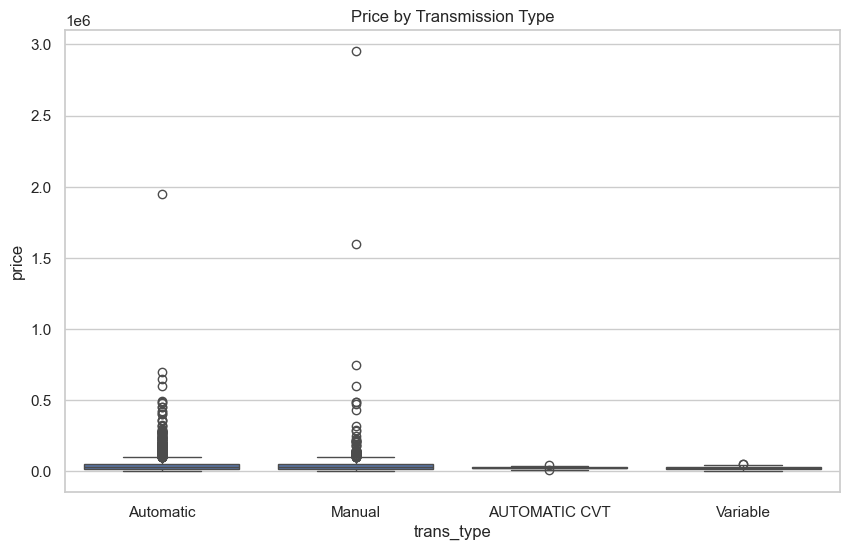

In [7]:
# Price by Transmission
plt.figure(figsize=(10,6))
sns.boxplot(x="trans_type", y="price", data=df)
plt.title("Price by Transmission Type")
plt.show()
